# Streaming Technologies

### 1. stream()
This is a sync method for streaming back results.


### 2. astream()
This is an async method for streaming back results.

### Parameters in strreaming:
`values`: This streams the full state of graph after each node is called. <br>
`updates`: This streams the updates to the state of the graph after each node is called.

### Using streaming in a simple chatbot

In [2]:
# import required libraries
from typing_extensions import Annotated
from typing import TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages

In [16]:
# create class state
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [17]:
# setting up environment
import os
from dotenv import load_dotenv
load_dotenv()

# os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"] = "Streaming_DEMO"
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [18]:
# initialize llm model
from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [19]:
# incorporating memory and creating node
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

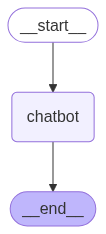

In [20]:
graph = StateGraph(State)

# adding nodes
graph.add_node("chatbot", chatbot)

# adding edges
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

# compile graph
builder = graph.compile(checkpointer = memory)

# display graph
from IPython.display import display, Image
display(Image(builder.get_graph().draw_mermaid_png()))

In [23]:
# configurable key
config = {"configurable":{"thread_id":"tijus"}}

In [22]:
# invoke
builder.invoke({"messages":"what is Quantum computing?"}, config)

{'messages': [HumanMessage(content='what is Quantum computing?', additional_kwargs={}, response_metadata={}, id='af6b2a05-d62c-4a53-a6ef-81b77347238a'),
  AIMessage(content="## Quantum Computing: A Leap Beyond Classical\n\nQuantum computing is a new type of computing that harnesses the principles of quantum mechanics to solve problems too complex for classical computers. \n\n**Here's a breakdown:**\n\n* **Classical Computers:** Use bits, which can be either 0 or 1. They process information sequentially.\n* **Quantum Computers:** Use qubits, which can be 0, 1, or both simultaneously (superposition). They can also be linked together in ways that classical bits can't (entanglement), allowing for parallel processing on a massive scale.\n\nThis unique ability gives quantum computers the potential to:\n\n* **Solve certain problems exponentially faster:**  Examples include:\n    * **Drug discovery:** Simulating molecular interactions to design new drugs.\n    * **Materials science:** Discover

In [24]:
# using stream
config = {"configurable":{"thread_id":"1"}}
for chunk in builder.stream({"messages":"Hi, my name is Sujit and I like chess"}, config, stream_mode = "updates"):
    print(chunk)

{'chatbot': {'messages': [AIMessage(content="Hi Sujit,\n\nThat's great! Chess is a fascinating game. \n\nDo you play online or in person? Do you have a favorite opening or strategy?  \n\nI'd love to hear more about your chess journey! 😄  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 20, 'total_tokens': 75, 'completion_time': 0.1, 'prompt_time': 0.001321539, 'queue_time': 0.262588411, 'total_time': 0.101321539}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--c545d712-3635-4d32-a939-ae3f9b3ab5c6-0', usage_metadata={'input_tokens': 20, 'output_tokens': 55, 'total_tokens': 75})]}}


In [ ]:

for chunk in builder.stream({"messages":"Hi, my name is Sujit and I like chess"}, config, stream_mode = "values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Sujit and I like chess', additional_kwargs={}, response_metadata={}, id='17042c08-69de-4a56-9325-35f04c6716d2'), AIMessage(content="Hi Sujit,\n\nThat's great! Chess is a fascinating game. \n\nDo you play online or in person? Do you have a favorite opening or strategy?  \n\nI'd love to hear more about your chess journey! 😄  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 20, 'total_tokens': 75, 'completion_time': 0.1, 'prompt_time': 0.001321539, 'queue_time': 0.262588411, 'total_time': 0.101321539}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--c545d712-3635-4d32-a939-ae3f9b3ab5c6-0', usage_metadata={'input_tokens': 20, 'output_tokens': 55, 'total_tokens': 75}), HumanMessage(content='Hi, my name is Sujit and I like chess', additional_kwargs={}, response_metadata={}, id='05d710e0-5850-428b-a927-dd3ac017b48

In [ ]:

for chunk in builder.stream({"messages":"I also like football"}, config, stream_mode = "updates"):
    print(chunk)

{'chatbot': {'messages': [AIMessage(content="That's awesome, Sujit! Football (soccer, I assume?) is a lot of fun too. \n\nDo you have a favorite team?  Or player?  \n\nI'm always up for talking about sports!  ⚽️ 🏆 \n\n\n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 156, 'total_tokens': 213, 'completion_time': 0.103636364, 'prompt_time': 0.004457357, 'queue_time': 0.255806304, 'total_time': 0.108093721}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--be96757a-db1f-466e-b1c6-dd11b40cfbf6-0', usage_metadata={'input_tokens': 156, 'output_tokens': 57, 'total_tokens': 213})]}}


In [ ]:

for chunk in builder.stream({"messages":"I just love sports"}, config, stream_mode = "values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Sujit and I like chess', additional_kwargs={}, response_metadata={}, id='17042c08-69de-4a56-9325-35f04c6716d2'), AIMessage(content="Hi Sujit,\n\nThat's great! Chess is a fascinating game. \n\nDo you play online or in person? Do you have a favorite opening or strategy?  \n\nI'd love to hear more about your chess journey! 😄  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 20, 'total_tokens': 75, 'completion_time': 0.1, 'prompt_time': 0.001321539, 'queue_time': 0.262588411, 'total_time': 0.101321539}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--c545d712-3635-4d32-a939-ae3f9b3ab5c6-0', usage_metadata={'input_tokens': 20, 'output_tokens': 55, 'total_tokens': 75}), HumanMessage(content='Hi, my name is Sujit and I like chess', additional_kwargs={}, response_metadata={}, id='05d710e0-5850-428b-a927-dd3ac017b48

#### Streaming the responses with astream methods

`Streaming tokens`: with chat models, we commonly want to be streaming **tokens** as they are generated.<br>
We do this using `.astream_events()` which streams back events as they happen. <br><br>
Each event is a dict with keys: <br>
* event: type of event that is being emmited
* name : name of the event
* data : data associated with the event 
* metadata : contains LangGraph node that is emmiting the event 

This is especially helpful when Debugging 

In [28]:
config = {"configurable":{"thread_id":"astream"}}

In [29]:
async for event in builder.astream_events({"messages":["Hi my name is Suzi and I like woking out."]}, config, version = "v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi my name is Suzi and I like woking out.']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'da976749-aa9a-45a0-8cfa-160a9ed466fa', 'metadata': {'thread_id': 'astream'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is Suzi and I like woking out.', additional_kwargs={}, response_metadata={}, id='8ee37892-f226-4932-8c2f-9ca4511f6199')]}}, 'name': 'chatbot', 'tags': ['graph:step:1'], 'run_id': '744bc9c9-5c4c-4d95-bd50-f593238a3a57', 'metadata': {'thread_id': 'astream', 'langgraph_step': 1, 'langgraph_node': 'chatbot', 'langgraph_triggers': ('branch:to:chatbot',), 'langgraph_path': ('__pregel_pull', 'chatbot'), 'langgraph_checkpoint_ns': 'chatbot:1336af4b-e1e3-a0d4-01ed-cccb0270b3c6'}, 'parent_ids': ['da976749-aa9a-45a0-8cfa-160a9ed466fa']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is Suzi and I like woking out